In [27]:
# import modules
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import keras
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# read in training value
train_set = pd.read_csv('./train_values.csv', index_col=0)
train_set.iloc[0]

geo_level_1_id                                6
geo_level_2_id                              487
geo_level_3_id                            12198
count_floors_pre_eq                           2
age                                          30
area_percentage                               6
height_percentage                             5
land_surface_condition                        t
foundation_type                               r
roof_type                                     n
ground_floor_type                             f
other_floor_type                              q
position                                      t
plan_configuration                            d
has_superstructure_adobe_mud                  1
has_superstructure_mud_mortar_stone           1
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber               

In [4]:
# read training label
train_label = pd.read_csv('./train_labels.csv', index_col=0)

In [5]:
train_set.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

<AxesSubplot:>

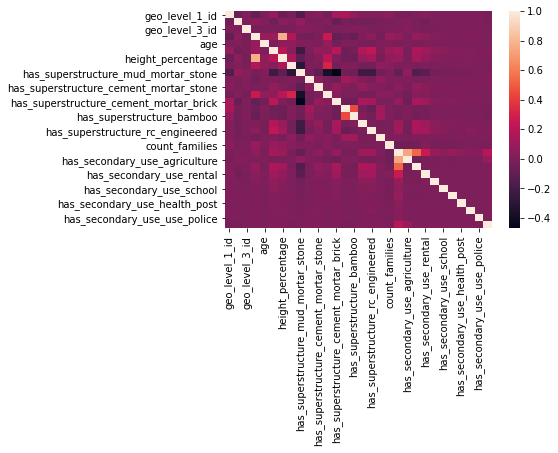

In [7]:
sns.heatmap(train_set.corr())

In [21]:
train_set[train_set['geo_level_1_id']==27]['geo_level_2_id'].unique()

array([ 216,  548,  390,  422, 1394, 1106, 1155,  533,  181, 1000,  269],
      dtype=int64)

In [8]:
dummy = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
dummy_col = pd.get_dummies(train_set[dummy])
train_set_combined = pd.concat([train_set, dummy_col],axis=1)
train_set_combined.drop(dummy, axis=1, inplace=True)

In [9]:
scaler = StandardScaler()
train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']] = scaler.fit_transform(train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']])

In [10]:
train_set_combined.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Split the test and train dataset
X_train, X_test, y_train, y_test = train_test_split(train_set_combined, train_label, test_size=0.2, random_state=42)

In [13]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, lin_pred)

0.30370591785254486

In [20]:
# use 2.5 threshold for classification
lin_reg_class = []
for num in lin_pred:
    if num >=2.5:
        lin_reg_class.append(3)
    elif num >=1.5 and num <2.5:
        lin_reg_class.append(2)
    elif num <1.5:
        lin_reg_class.append(1)

In [22]:
accuracy_score(lin_reg_class, y_test)

0.5746436177356535

In [24]:
# use 2.3 threshold for classification
lin_reg_class = []
for num in lin_pred:
    if num >=2.3:
        lin_reg_class.append(3)
    elif num >=1.3 and num <2.3:
        lin_reg_class.append(2)
    elif num <1.3:
        lin_reg_class.append(1)
accuracy_score(lin_reg_class, y_test)

0.5086049768807198

In [30]:
# GridSearch - Logistic Regression
log_param = {
    'multi_class': ['multinomial'],
    'solver': ['lbfgs', 'liblinear', 'sag']
}

log_clf= GridSearchCV(LogisticRegression(), log_param)
log_clf.fit(X_train, y_train)
log_pred = log_clf.predict(X_test)
accuracy_score(y_test, log_pred)

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did n

0.5881122772011281

In [25]:
# GridSearch - KNN
knn_param = {
    'n_neighbors': [5, 20, 50, 100, 200],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_clf = GridSearchCV(KNeighborsClassifier(), knn_param, cv=10)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
accuracy_score(knn_pred, y_test)

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

0.6893574566873237

In [26]:
knn_clf.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

In [31]:
# Neural Network
NN_clf = keras.Sequential([keras.layers.Flatten(),
                keras.layers.Dense(128,activation = tf.nn.sigmoid),
                keras.layers.Dense(128,activation = tf.nn.relu),
                keras.layers.Dense(5,activation = tf.nn.softmax)])
NN_clf.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

NN_clf.fit(X_train, y_train,epochs = 50)

Epoch 1/50
6515/6515 [==============================] - 21s 783us/step - loss: 0.8075 - accuracy: 0.5903
Epoch 2/50
6515/6515 [==============================] - 5s 778us/step - loss: 0.7612 - accuracy: 0.6241
Epoch 3/50
6515/6515 [==============================] - 5s 781us/step - loss: 0.7493 - accuracy: 0.6320
Epoch 4/50
6515/6515 [==============================] - 5s 781us/step - loss: 0.7262 - accuracy: 0.6522
Epoch 5/50
6515/6515 [==============================] - 5s 785us/step - loss: 0.7164 - accuracy: 0.6576
Epoch 6/50
6515/6515 [==============================] - 5s 791us/step - loss: 0.7109 - accuracy: 0.6633
Epoch 7/50
6515/6515 [==============================] - 5s 794us/step - loss: 0.7052 - accuracy: 0.6660
Epoch 8/50
6515/6515 [==============================] - 5s 783us/step - loss: 0.7004 - accuracy: 0.6694
Epoch 9/50
6515/6515 [==============================] - 5s 786us/step - loss: 0.6960 - accuracy: 0.6728
Epoch 10/50
6515/6515 [==============================] - 5s 784

In [32]:
NN_pred = NN_clf.predict(X_test)
NN_clf.evaluate(X_test, y_test, verbose=0)

[0.6886117458343506, 0.685673713684082]

In [ ]:
# PCA

In [85]:
# XGBoosting
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
accuracy_score(xgb_pred, y_test)

[21:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7267878384773794

In [88]:
# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(rf_pred, y_test)

<ipython-input-88-f89b27e642f0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.7106074365894527